<a href="https://colab.research.google.com/github/Sphinx500/CarPrice/blob/main/CarPrice_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Dataset CarPrice

FERNANDO HERNANDEZ VAZQUEZ.
IDGS-91
EXTRACCION DE CONOCIMIENTOS

# Importar librerias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stas
from google.colab import files

# Cargar el Dataset

In [5]:
files.upload()
dataframe = pd.read_csv("car_price_assignment.csv")

Saving car_price_assignment.csv to car_price_assignment.csv


# Forma del Dataset

In [7]:
dataframe.shape

(205, 26)

# 5 Primeros Registros

In [8]:
dataframe.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 5 Ultimos Registros

In [9]:
dataframe.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


# Contar valores Nulos

In [10]:
dataframe.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Ver informacion del Dataset

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Promedio de cada una de las columnas

In [13]:
dataframe.mean()

car_ID                103.000000
symboling               0.834146
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64

In [14]:
cols = ['symboling', 'wheelbase', 'carlength', 'carwidth'] #Hacemos la selección de columnas
for col in cols:
    print("Columna {} : Mean {}". format(col, dataframe[col].mean()))
    print("Columna {} : Mean {}". format(col, dataframe[col].median()))
    print("Columna {} : Mean {}". format(col, dataframe[col].mode()))

Columna symboling : Mean 0.8341463414634146
Columna symboling : Mean 1.0
Columna symboling : Mean 0    0
dtype: int64
Columna wheelbase : Mean 98.75658536585378
Columna wheelbase : Mean 97.0
Columna wheelbase : Mean 0    94.5
dtype: float64
Columna carlength : Mean 174.04926829268305
Columna carlength : Mean 173.2
Columna carlength : Mean 0    157.3
dtype: float64
Columna carwidth : Mean 65.90780487804875
Columna carwidth : Mean 65.5
Columna carwidth : Mean 0    63.8
dtype: float64


# Describir el Dataset

In [15]:
dataframe.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Correlación entre pares de columnas

In [16]:
dataframe.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


# Graficar la correlación de columnas con un mapa de calor

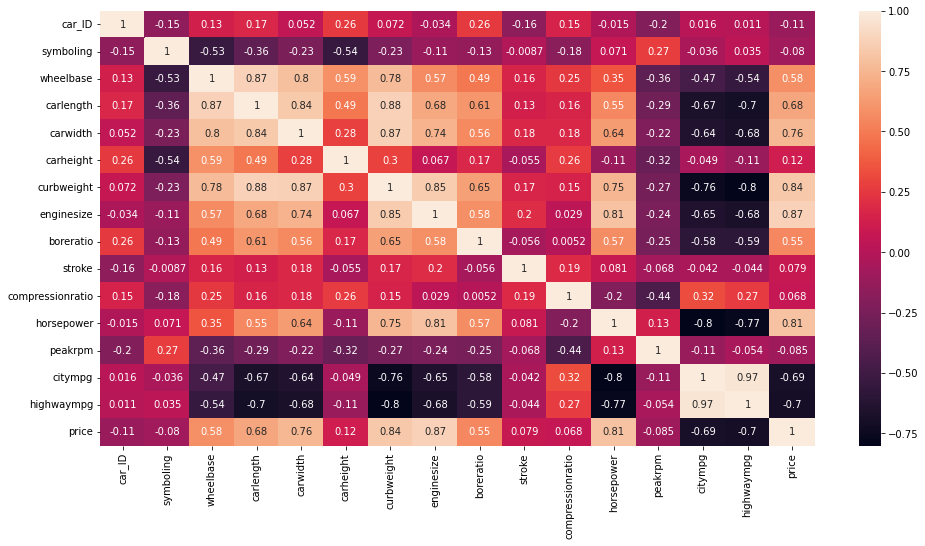

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(dataframe.corr(), annot=True)
plt.show()

# Funcion para seleccionar columnas de una correlación especifica

In [29]:
def correlacion(dataframe,threshold):
  cols_corr = set()
  corr_matrix = dataframe.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j]) >= threshold:
          col_name = corr_matrix.columns[i]
          cols_corr.add(col_name)
  return cols_corr

In [31]:
corr_cols = correlacion(dataframe.iloc[:,:-1], 0.80)
corr_cols

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

# Separar Columnas Categoricas

In [32]:
categorical_col = []
for col in dataframe:
  print(col)
  #Para devolver el tipo de dato de las columnas
  #print(dataframe[col].dtype)

car_ID
symboling
CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
wheelbase
carlength
carwidth
carheight
curbweight
enginetype
cylindernumber
enginesize
fuelsystem
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


In [33]:
def categoricas(dataframe):
  categorical_col = []
  for col in dataframe:
    if dataframe[col].dtype == 'object':
      categorical_col.append(col)
  return categorical_col

In [34]:
categorical_col = categoricas(dataframe)
print(categorical_col)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


# Obtener Columnas Numéricas

In [35]:
def numerical(dataframe):
  numerical_col = []
  for col in dataframe:
    if dataframe[col].dtype != 'object':
      numerical_col.append(col)
  return numerical_col

In [36]:
numerical_col = numerical(dataframe)
print(numerical_col)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


# Graficar columnas categoricas COUNT y BOX PLOT


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

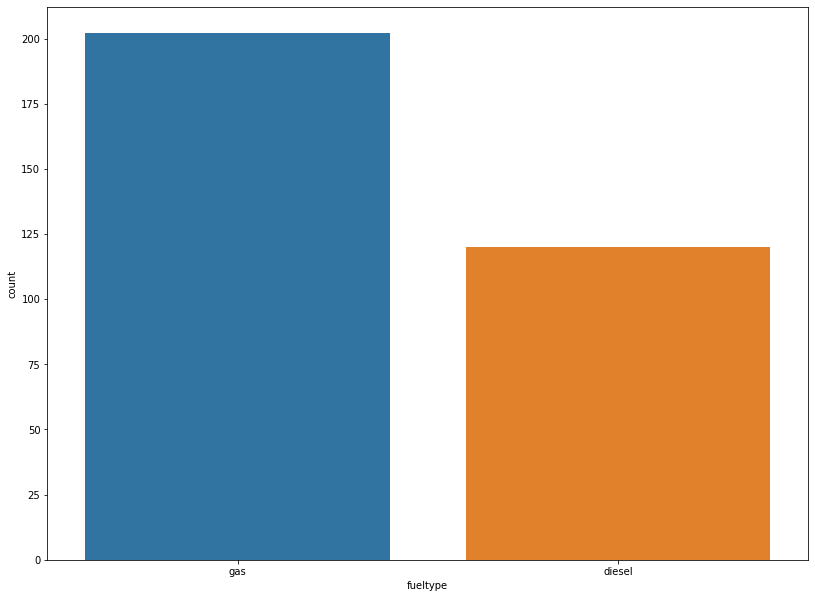

In [38]:
i = 1
plt.figure(figsize=(30,120))
for col in categorical_col:
  plt.subplot(len(categorical_col),2,i)
  sns.countplot(dataframe[col])

sns.countplot(dataframe['fueltype'])

# Graficar todas las columnas categoricas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

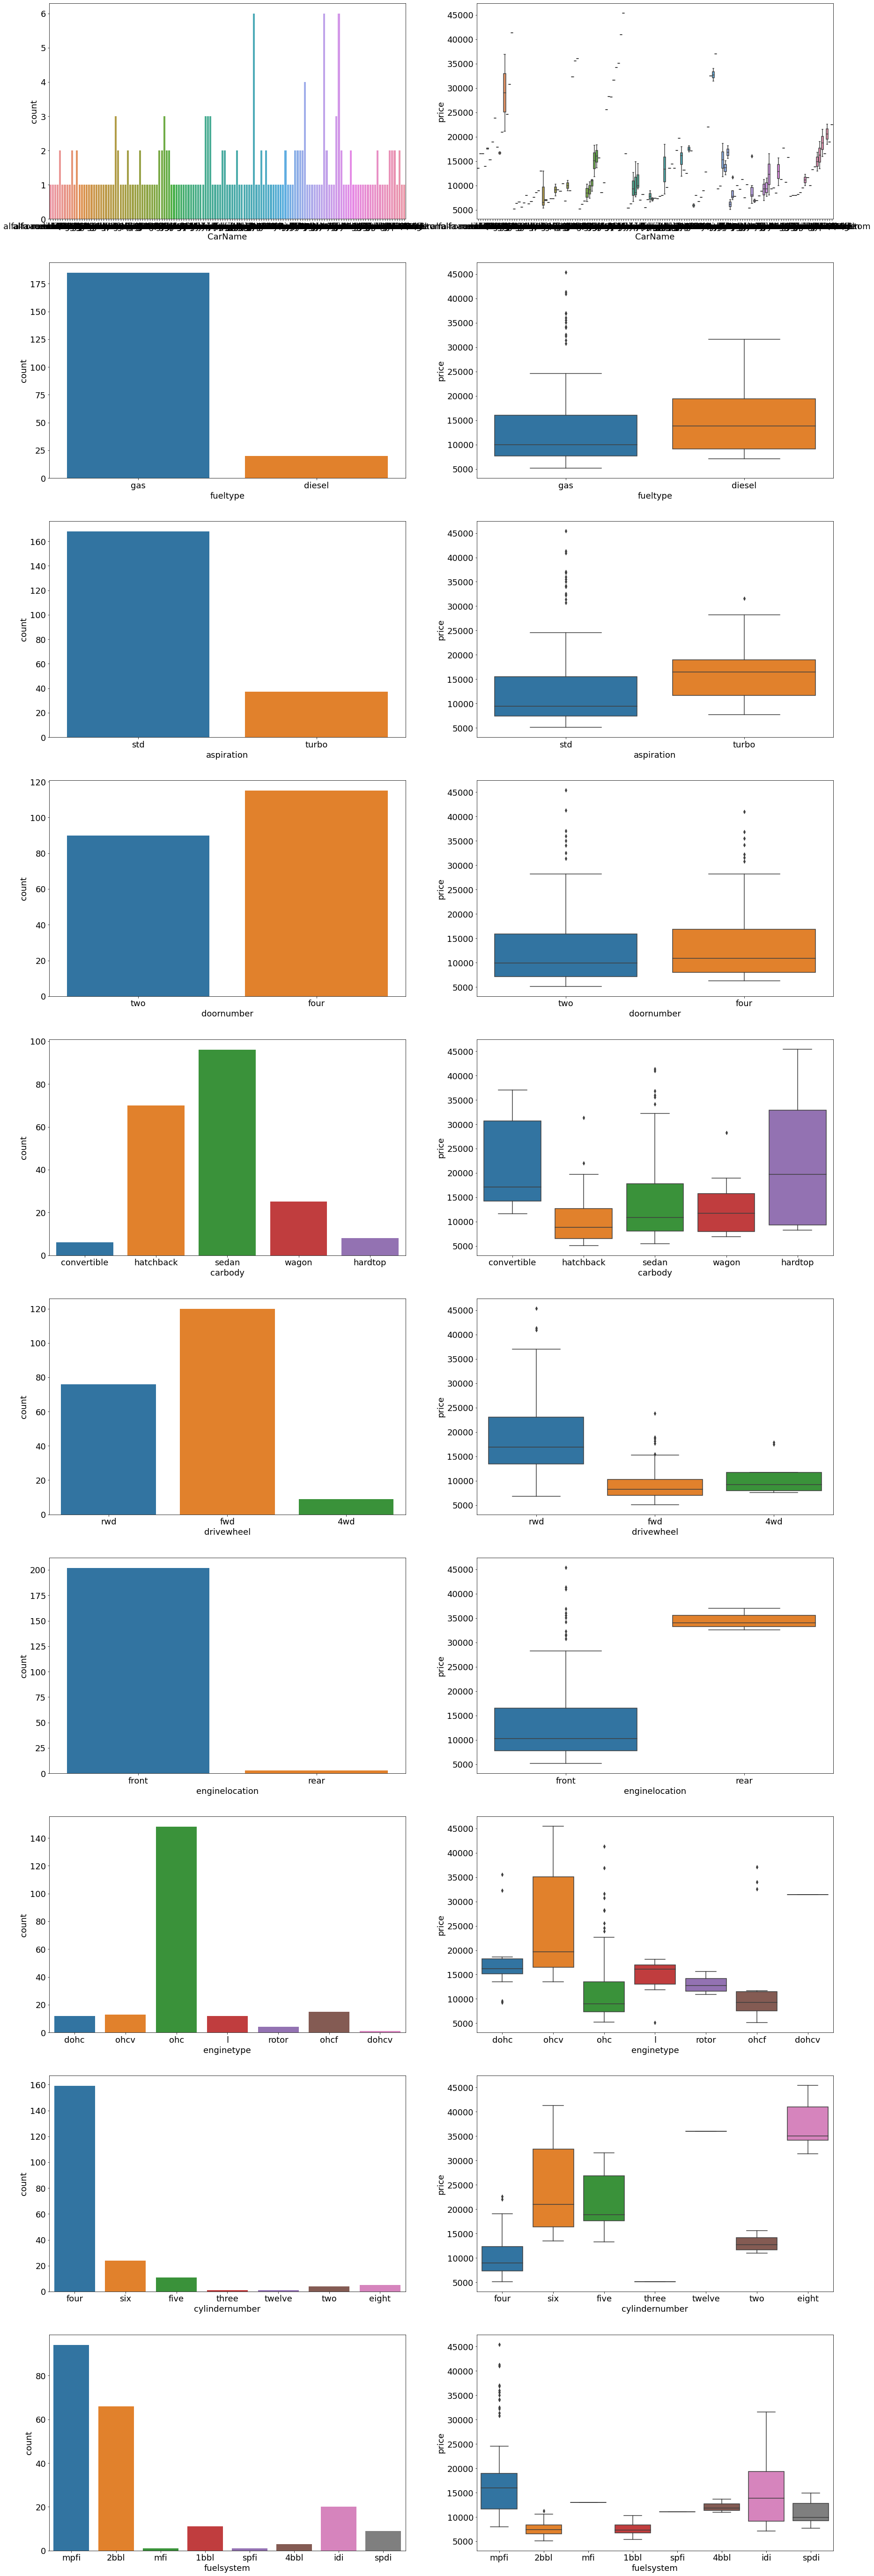

In [42]:
i = 1
plt.figure(figsize=(30,100))
for col in categorical_col:
  #COUNT PLOT
  plt.subplot(len(categorical_col),2,i)
  sns.countplot(dataframe[col])
  plt.yticks(fontsize=18)
  plt.xticks(fontsize=18)
  plt.xlabel(col, fontsize=18)
  plt.ylabel("count", fontsize=18)

  i = i + 1

  #BOX PLOT
  plt.subplot(len(categorical_col),2,i)
  sns.boxplot(x=dataframe[col], y=dataframe['price'])
  plt.yticks(fontsize=18)
  plt.xticks(fontsize=18)
  plt.xlabel(col, fontsize=18)
  plt.ylabel("price", fontsize=18)

  i = i + 1


# Graficar Columnas Numericas

In [43]:
numerical_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

Removemos las que no son necesarias, como el ID

In [ ]:
numerical_col.remove("car_ID")
numerical_col.remove("price")

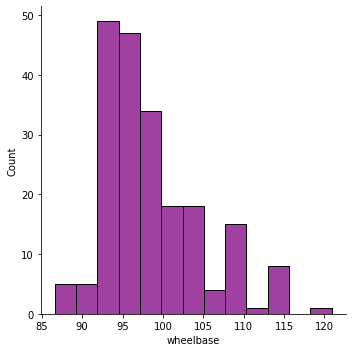

In [45]:
sns.displot(dataframe['wheelbase'], color='purple')

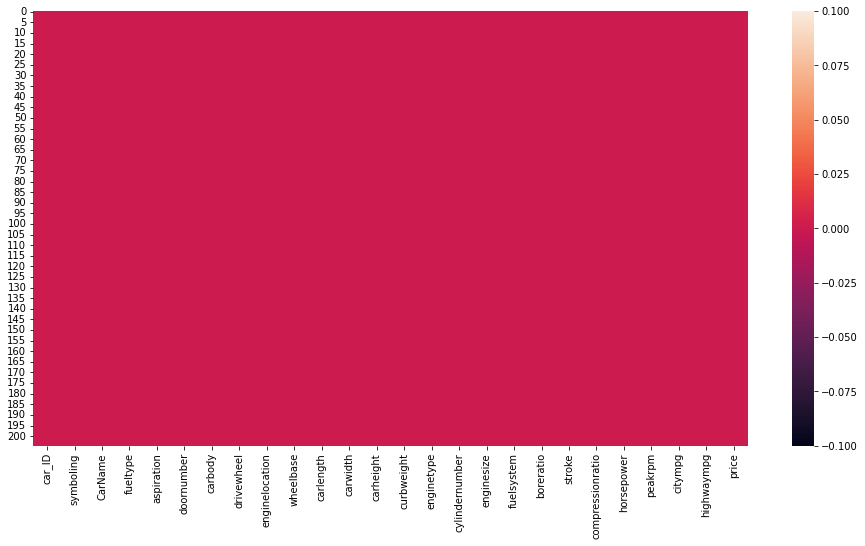

In [48]:
plt.figure(figsize=(16,8))
sns.heatmap(dataframe.isnull())
plt.show()

#CONCLUSIONES

Tal y como pudimos observar en esta actividad, el analisis de datos es algo que no hay que tomar a la ligera, cuando se trabaja con grandes volumenes de los mismos es importante convertir esta información en conocimiento de valor que pueda ser interpretado y utilizado a favor de quienes lo requieran. Por ello a su vez es importante reconocer qué datos van a aportar verdadero valor y omitir los que puedan "contaminar el muestreo" o generar conocimientos erronéos.